**Question 2:**

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torch import nn

In [133]:
class DNN(nn.Module):
    def __init__(self, 
                input_dim,     # dimension of the input feature vector
                output_dim,    # dimension of the output vector/prediction
                width,         # width of each hidden layer (number of neurons)
                depth,         # depth of the neural network (nb of hidden layers + output layer)
                activation     # type of activation function (nn.Tanh() or nn.ReLU())
                ) -> None:
        super(DNN, self).__init__()
        self.depth = depth
        self.layers = nn.ModuleList()
        # input layer
        self.layers.append(nn.Linear(input_dim, width))
        # hidden layers
        for _ in range(self.depth - 1):
            self.layers.append(nn.Linear(width, width))
        # output layer
        self.layers.append(nn.Linear(width, output_dim))

        # setting a uniform distribution (-1, 1) for weights and bias
        for layer in self.layers:
            nn.init.uniform_(layer.weight, -1, 1)
            nn.init.uniform_(layer.bias,   -1, 1)

        # setting the activation function
        self.act = activation
        
    def forward(self, x):
        for pos, layer in enumerate(self.layers):
            if pos != self.depth:
                x = self.act(layer(x))
            else:
                x = layer(x)
        return x

**Question 3:**

part a:

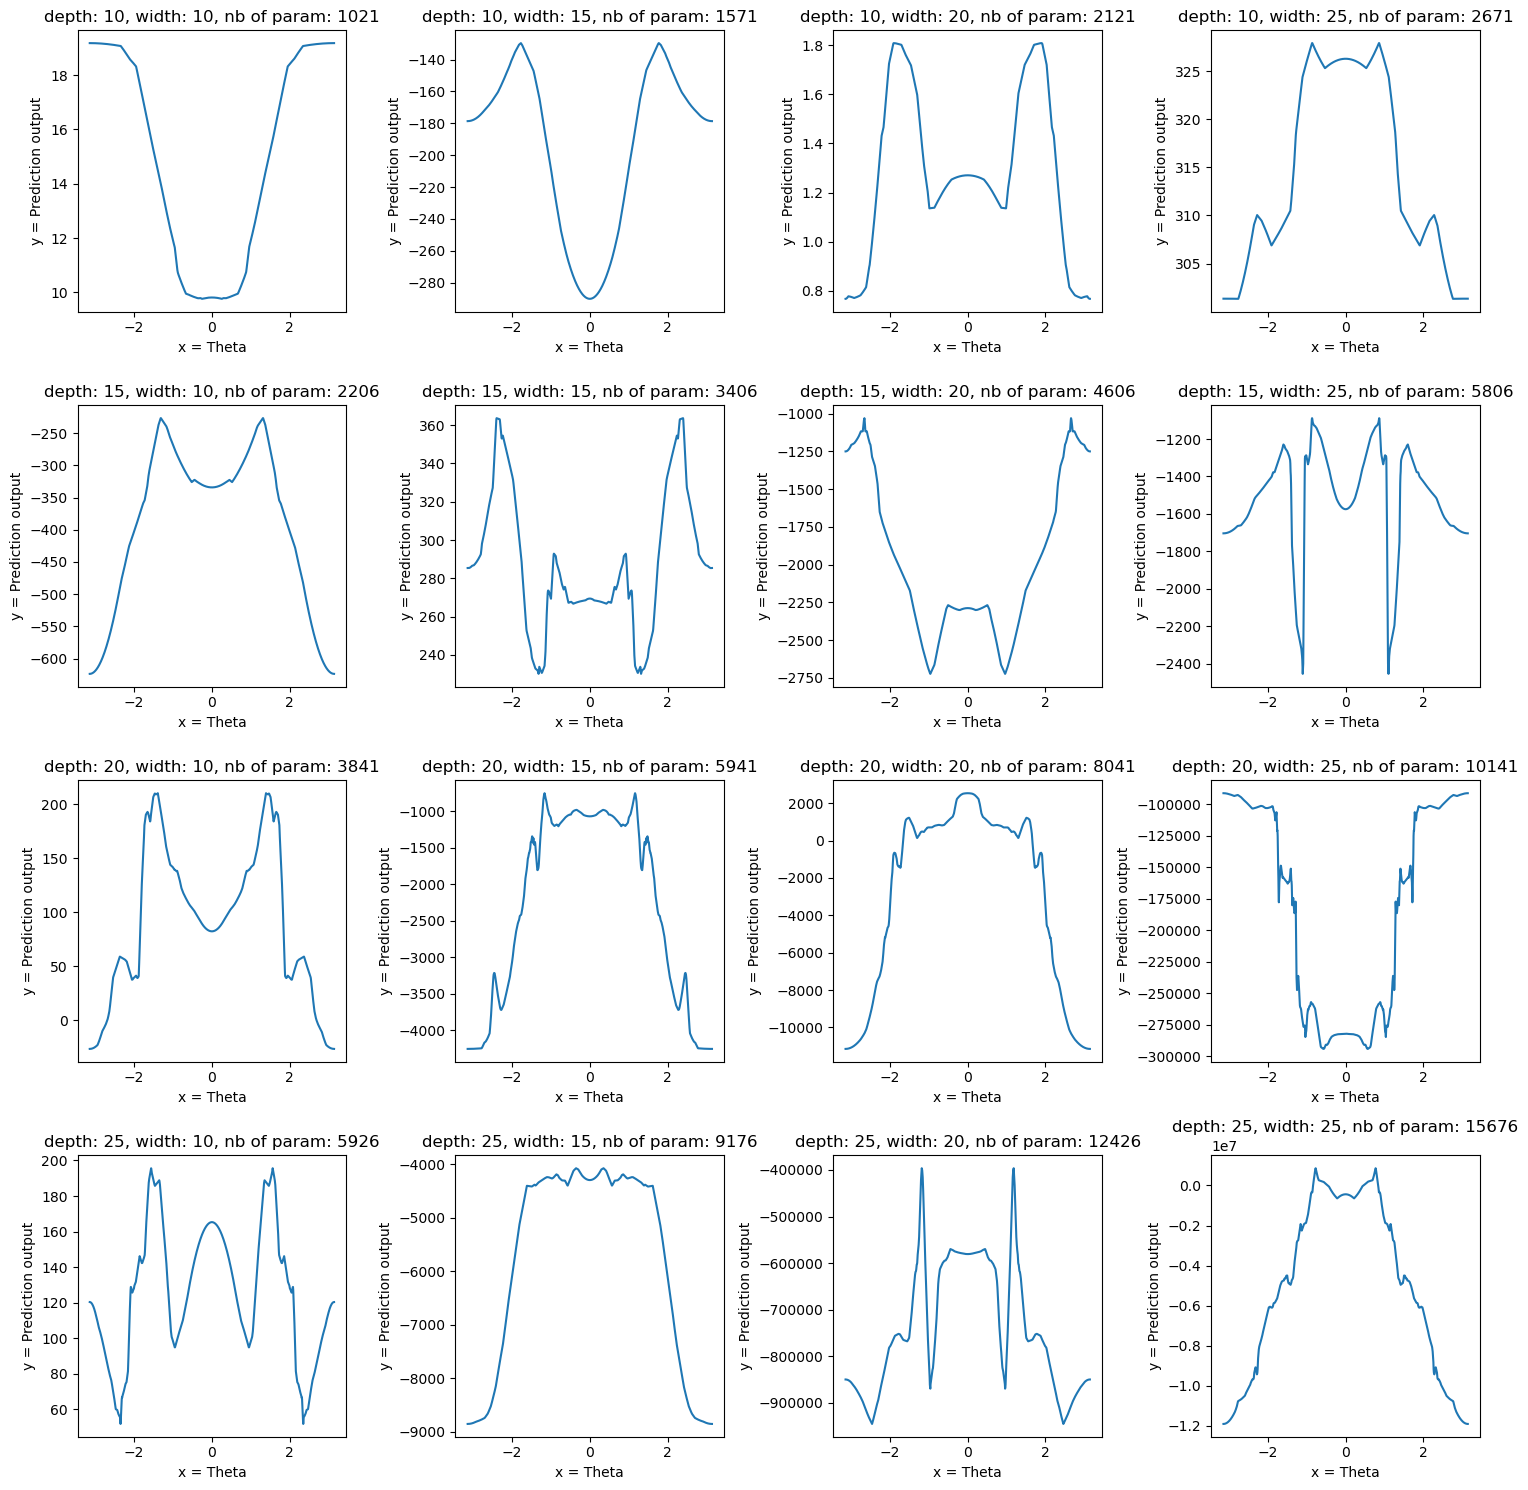

In [134]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.ReLU())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
        axs[i, j].plot(theta, y_pred)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("x = Theta")
        axs[i, j].set_ylabel("y = Prediction output")

fig.tight_layout()
plt.show()

part b:

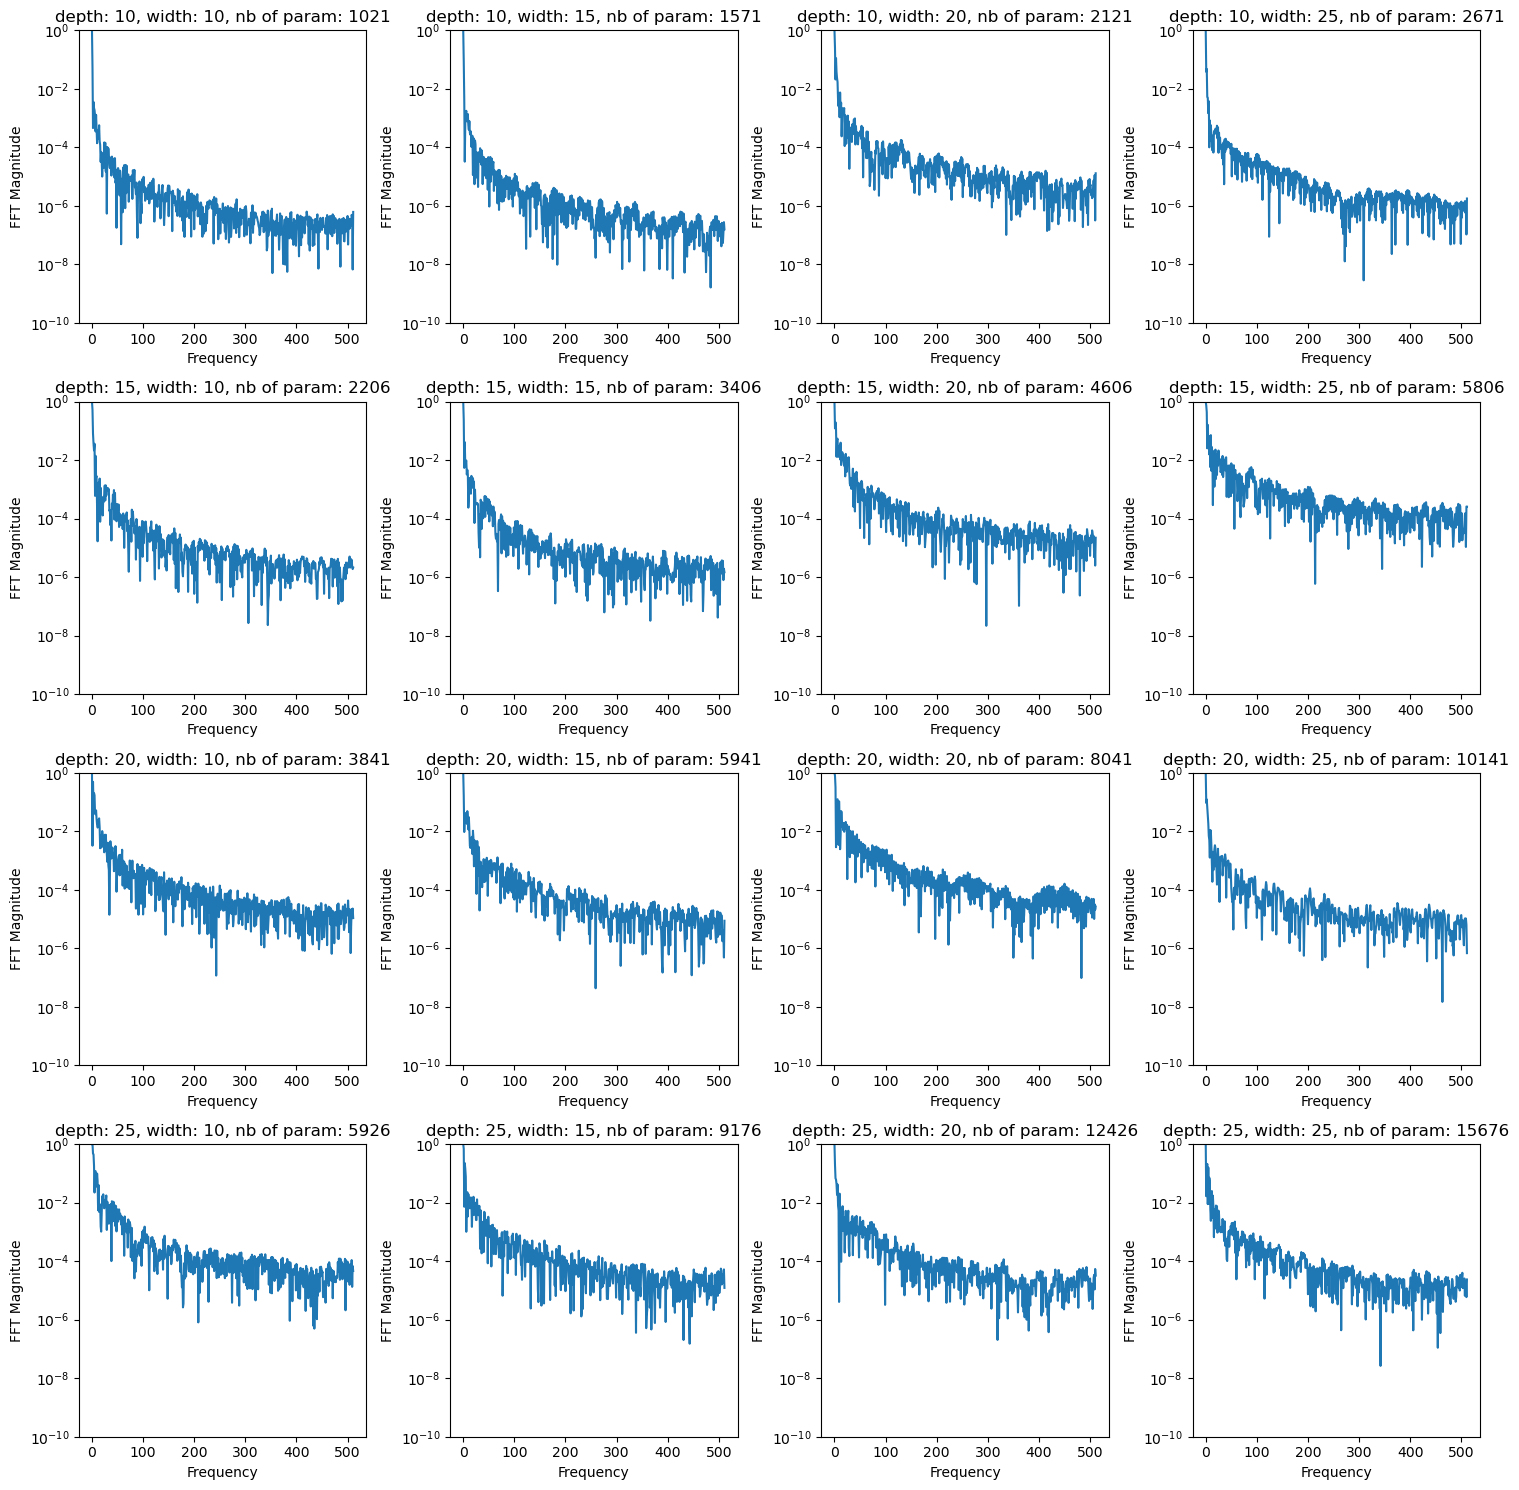

In [135]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.ReLU())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
            y_pred_fft = np.abs(np.fft.fft(y_pred))[:len(y_pred)//2]
            y_pred_fft /= y_pred_fft[0]
        axs[i, j].semilogy(y_pred_fft)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("Frequency")
        axs[i, j].set_ylabel("FFT Magnitude")
        axs[i, j].set_ylim([1e-10, 1])

fig.tight_layout()
plt.show()

part c:

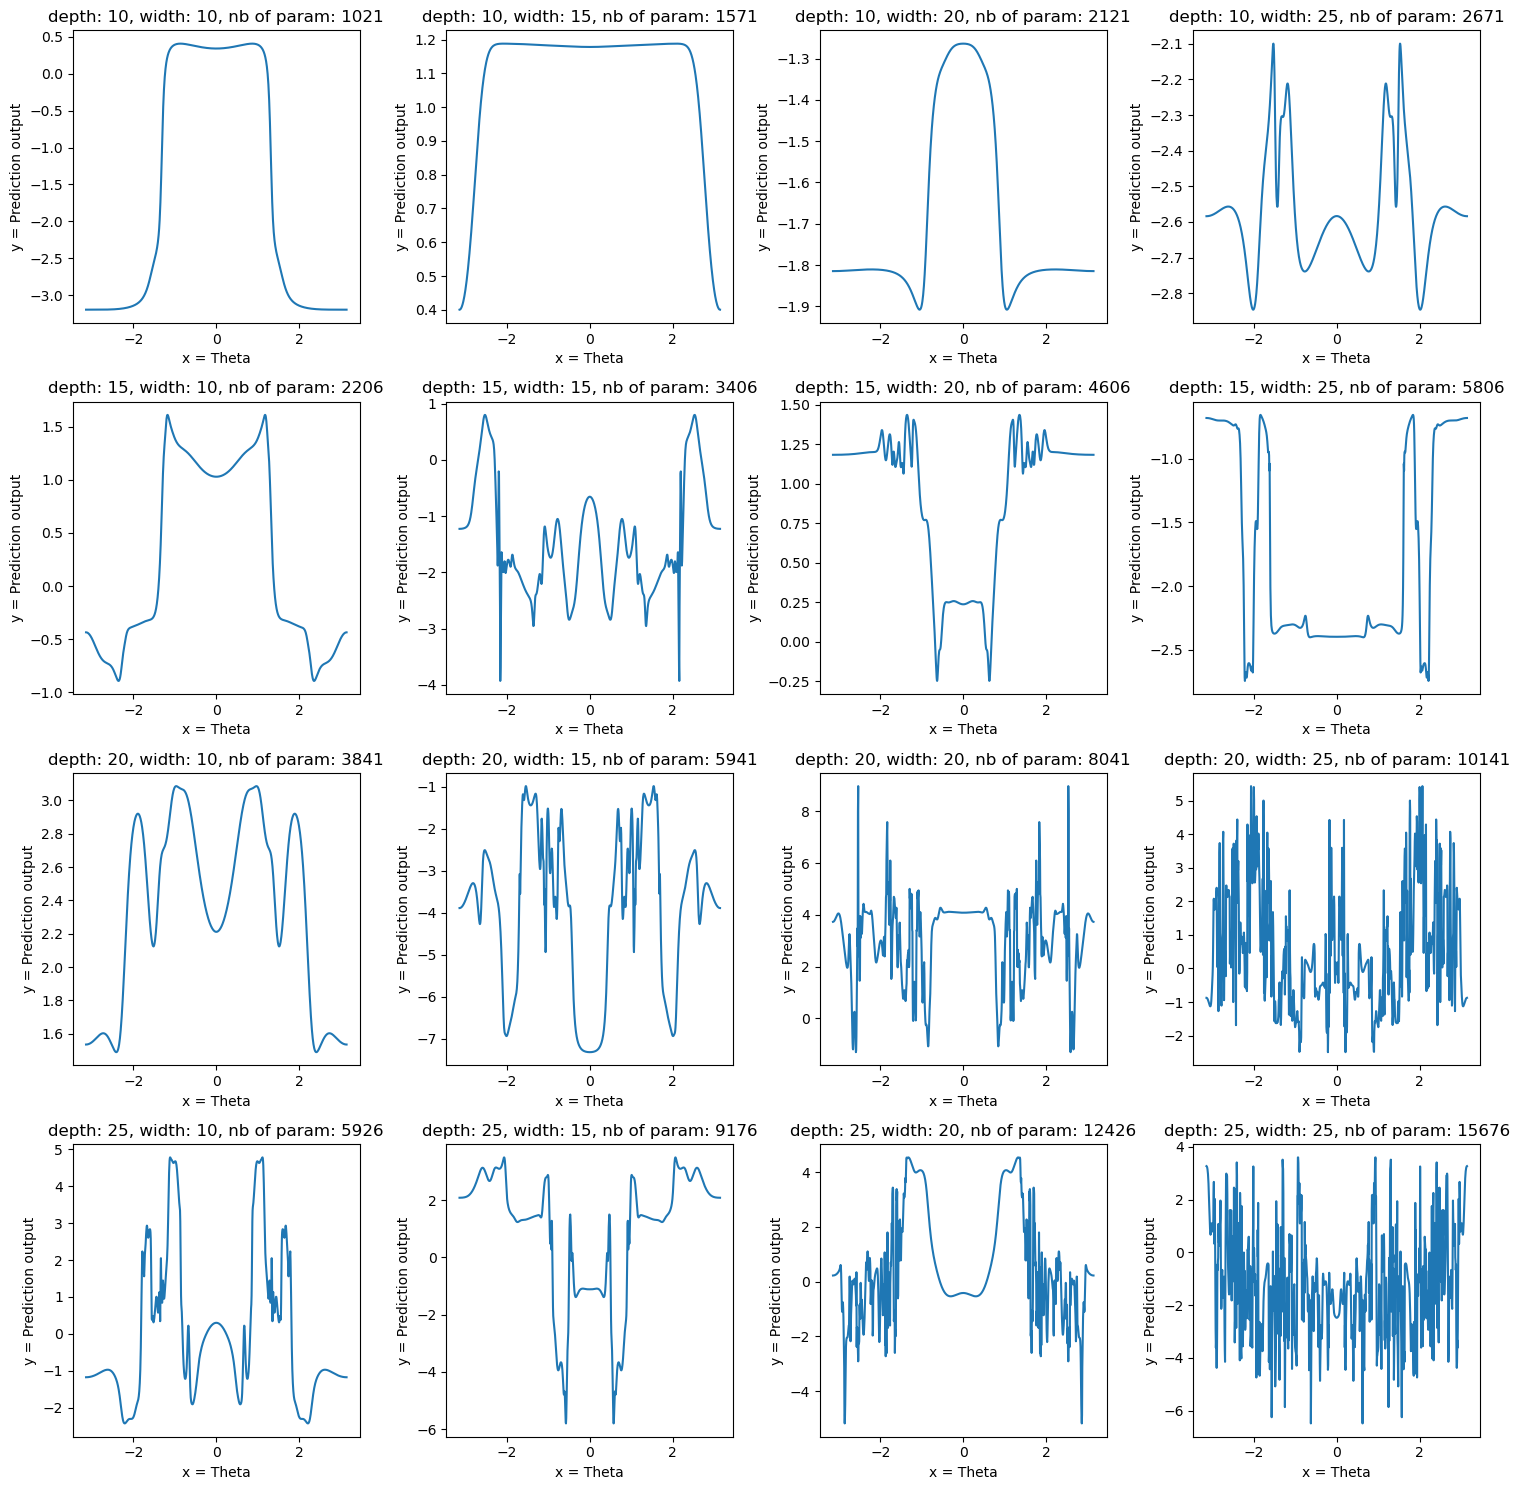

In [136]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.Tanh())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
        axs[i, j].plot(theta, y_pred)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("x = Theta")
        axs[i, j].set_ylabel("y = Prediction output")

fig.tight_layout()
plt.show()

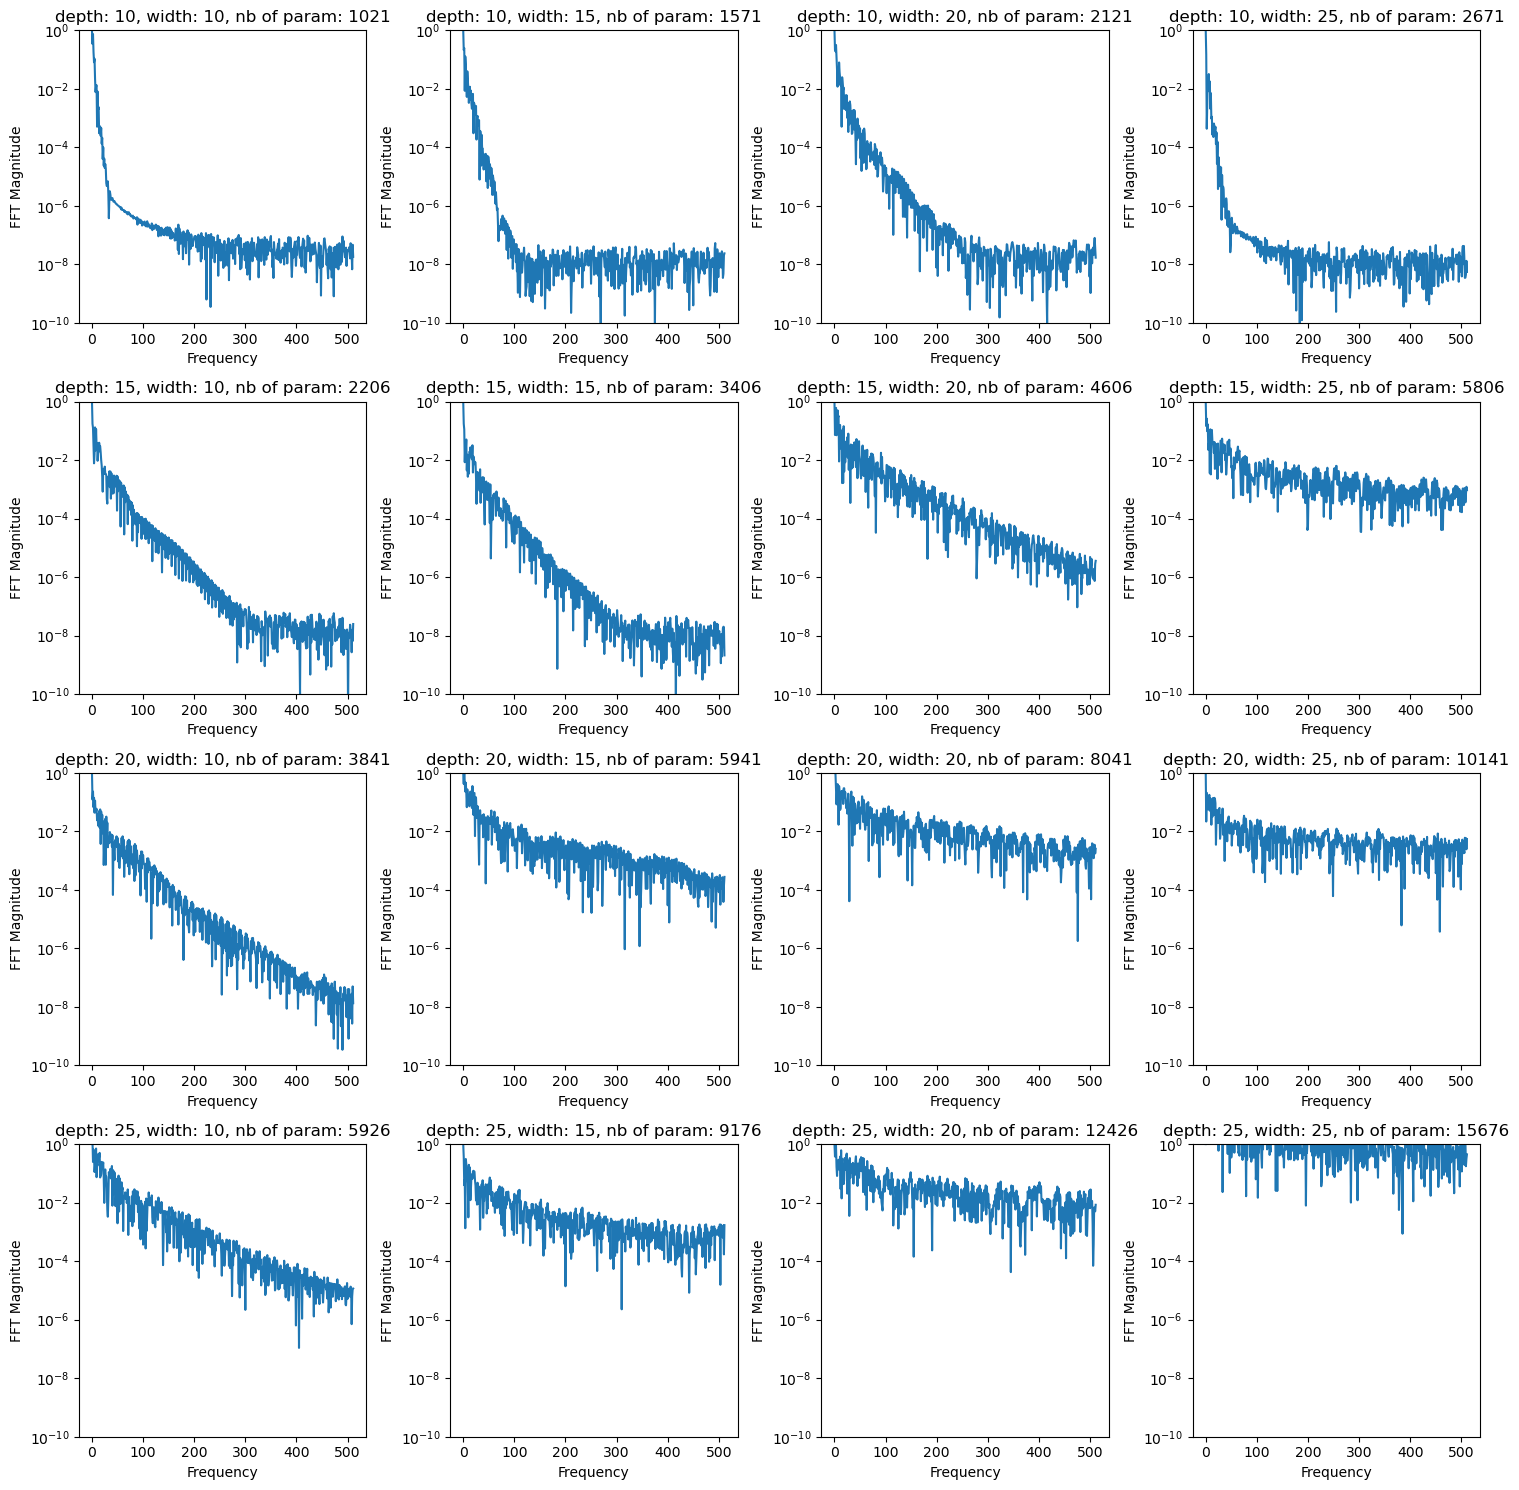

In [137]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.Tanh())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
            y_pred_fft = np.abs(np.fft.fft(y_pred))[:len(y_pred)//2]
            y_pred_fft /= y_pred_fft[0]
        axs[i, j].semilogy(y_pred_fft)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("Frequency")
        axs[i, j].set_ylabel("FFT Magnitude")
        axs[i, j].set_ylim([1e-10, 1])

fig.tight_layout()
plt.show()

part d: As a function of width and depth, we can observe that our signals get more and more complex in their output. This translates in Fourier Transforms that have higher magnitudes for higher frequencies, ie a very oscillatory behaviour. Since we are essentially increasing the number of parameters in our models, this corresponds to a behaviour of overfitting.

part e: The choice of the activation function seems to have an impact on the oscillation properties of the output: the tanh activation function seems to provide outputs that are much more oscillatory compared to outputs from relu. This means that the associated FFTs have higher magnitudes accross all frequencies, and present overall less decay as the frequency increases. 

part f: The trends can vary when re-running the script. This is due to the random initialization of the neural network's weights and biases. However, although there can be significant variations when re-running the script, the core trends observed in the output and FFT plots remain consistent.

part g: Overall, increasing the width, the depth (and choosing an appropriate activation function) can lead to a network that yields more expressivity, ie a network that can approximate a wider range of functions and more complex functions. However, doing so means that the network can fit the data more precisely, which can lead to overfitting.

In [138]:
a = 5

class DNN(nn.Module):
    def __init__(self, 
                input_dim,     # dimension of the input feature vector
                output_dim,    # dimension of the output vector/prediction
                width,         # width of each hidden layer (number of neurons)
                depth,         # depth of the neural network (nb of hidden layers + output layer)
                activation     # type of activation function (nn.Tanh() or nn.ReLU())
                ) -> None:
        super(DNN, self).__init__()
        self.depth = depth
        self.layers = nn.ModuleList()
        # input layer
        self.layers.append(nn.Linear(input_dim, width))
        # hidden layers
        for _ in range(self.depth - 1):
            self.layers.append(nn.Linear(width, width))
        # output layer
        self.layers.append(nn.Linear(width, output_dim))

        # setting a uniform distribution (-1, 1) for weights and bias
        for layer in self.layers:
            nn.init.uniform_(layer.weight, -a, a)
            nn.init.uniform_(layer.bias,   -a, a)

        # setting the activation function
        self.act = activation
        
    def forward(self, x):
        for pos, layer in enumerate(self.layers):
            if pos != self.depth:
                x = self.act(layer(x))
            else:
                x = layer(x)
        return x

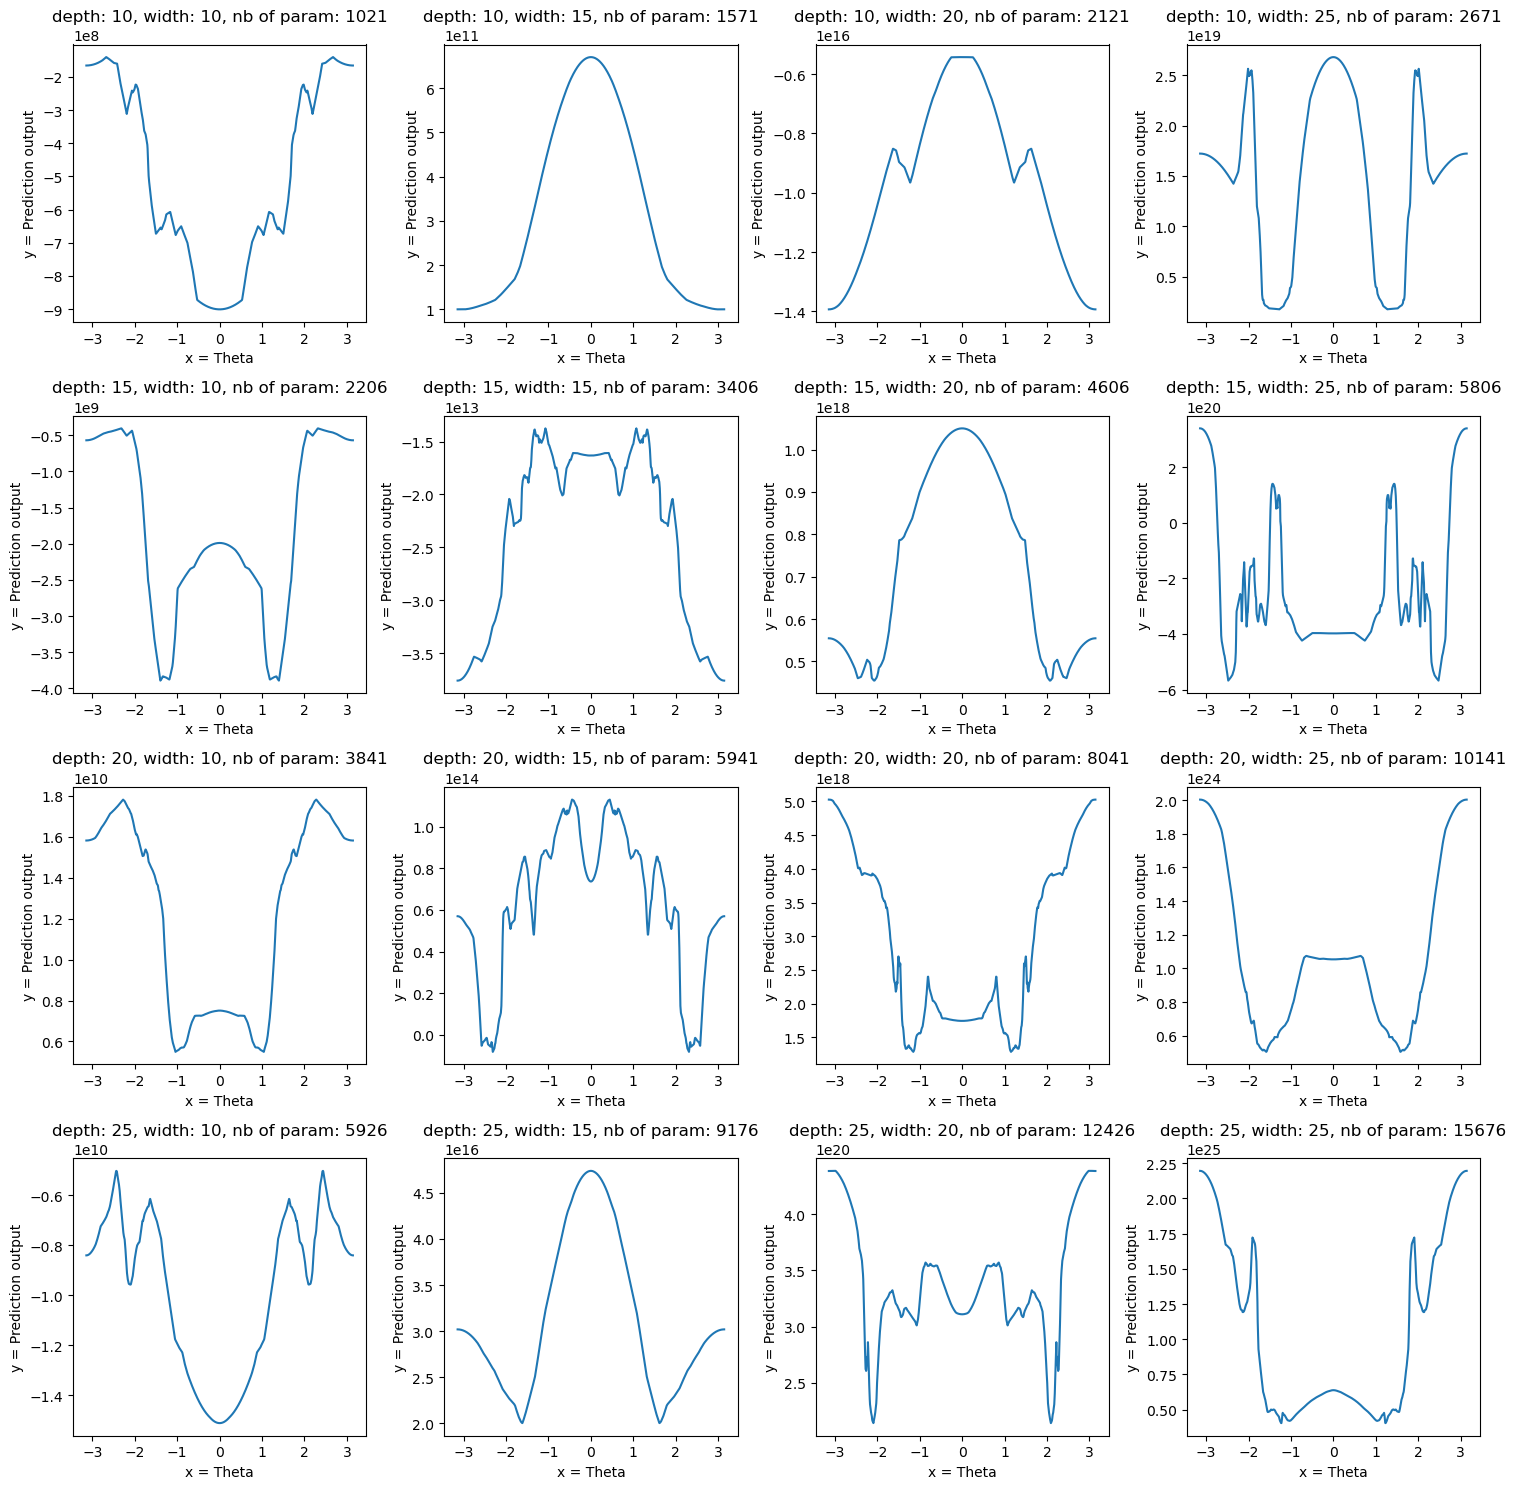

In [139]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.ReLU())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
        axs[i, j].plot(theta, y_pred)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("x = Theta")
        axs[i, j].set_ylabel("y = Prediction output")

fig.tight_layout()
plt.show()

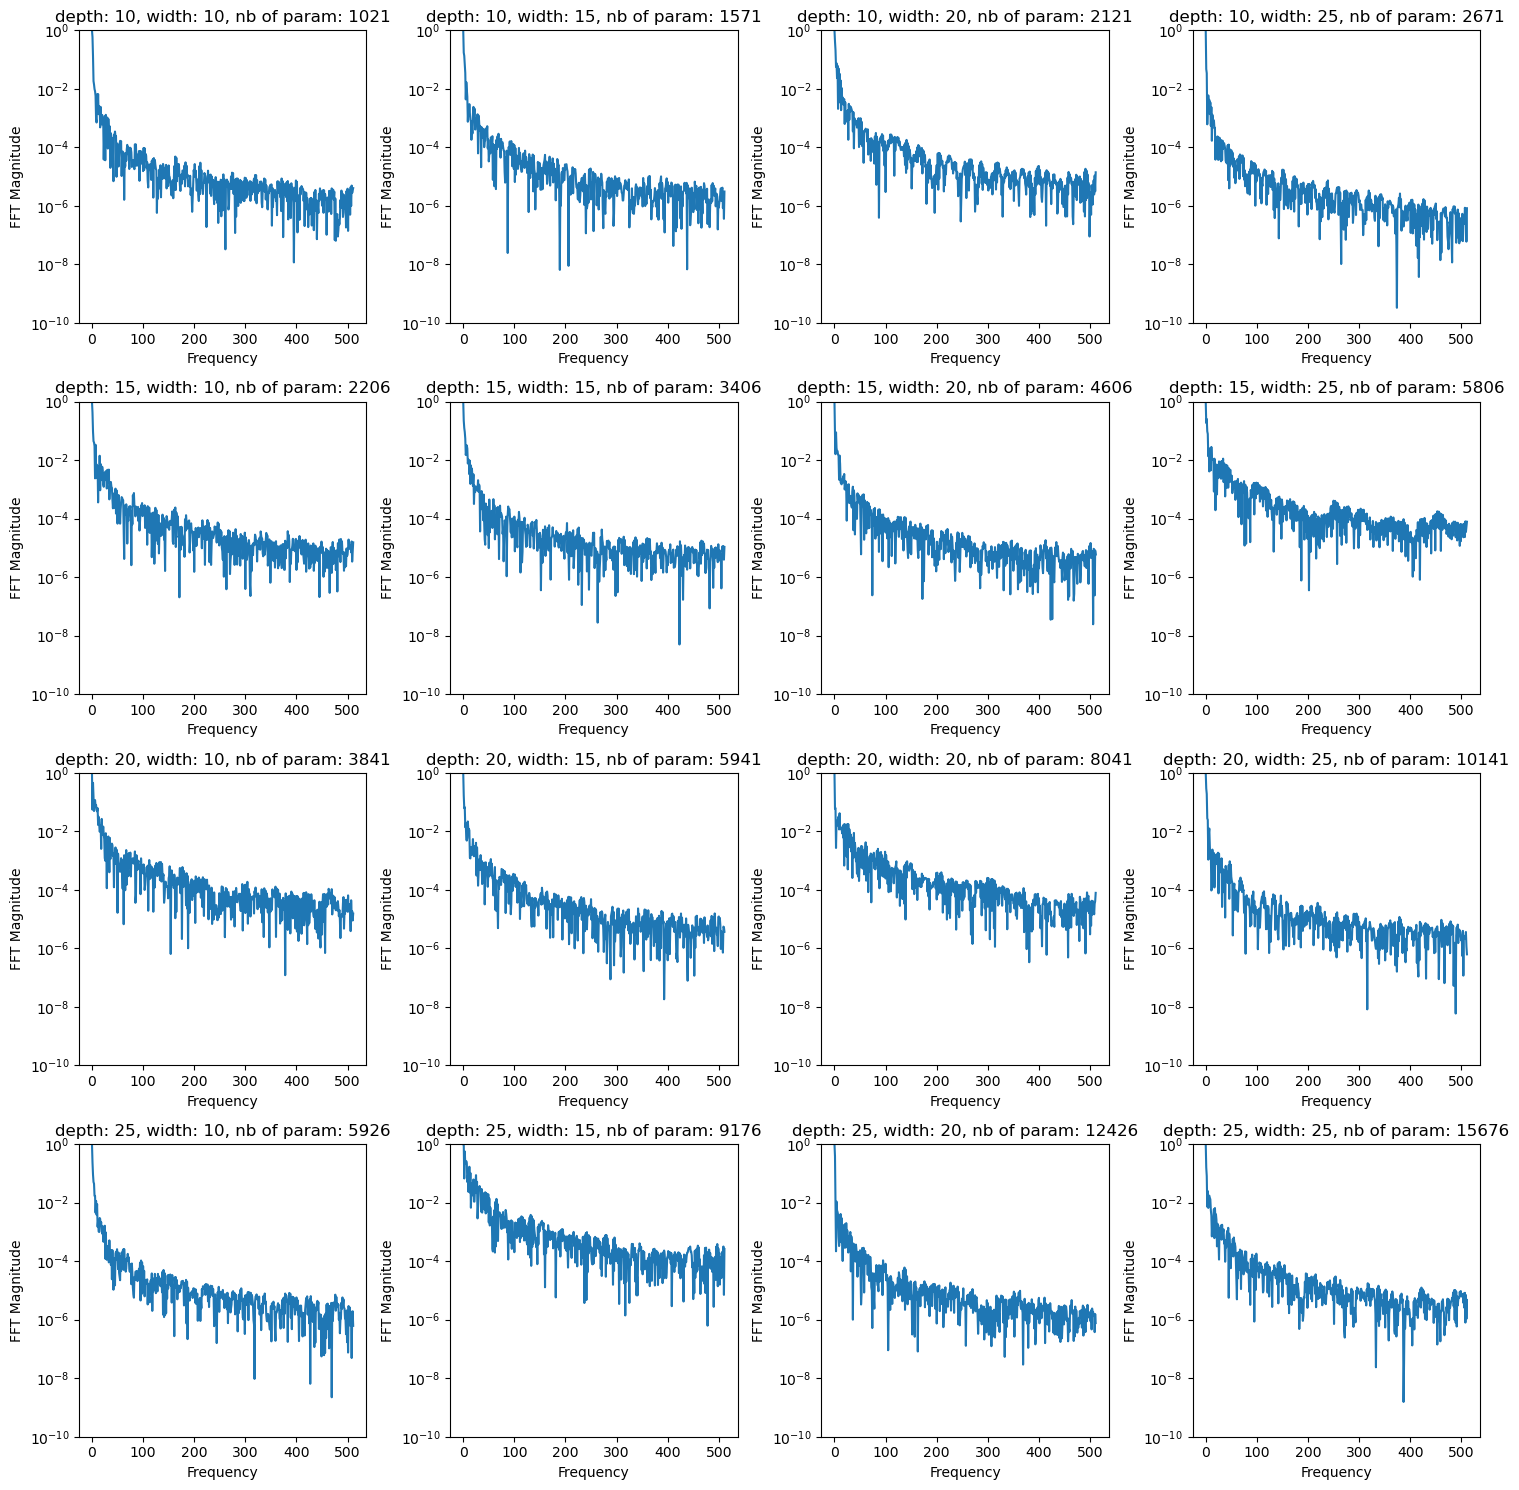

In [140]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.ReLU())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
            y_pred_fft = np.abs(np.fft.fft(y_pred))[:len(y_pred)//2]
            y_pred_fft /= y_pred_fft[0]
        axs[i, j].semilogy(y_pred_fft)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("Frequency")
        axs[i, j].set_ylabel("FFT Magnitude")
        axs[i, j].set_ylim([1e-10, 1])

fig.tight_layout()
plt.show()

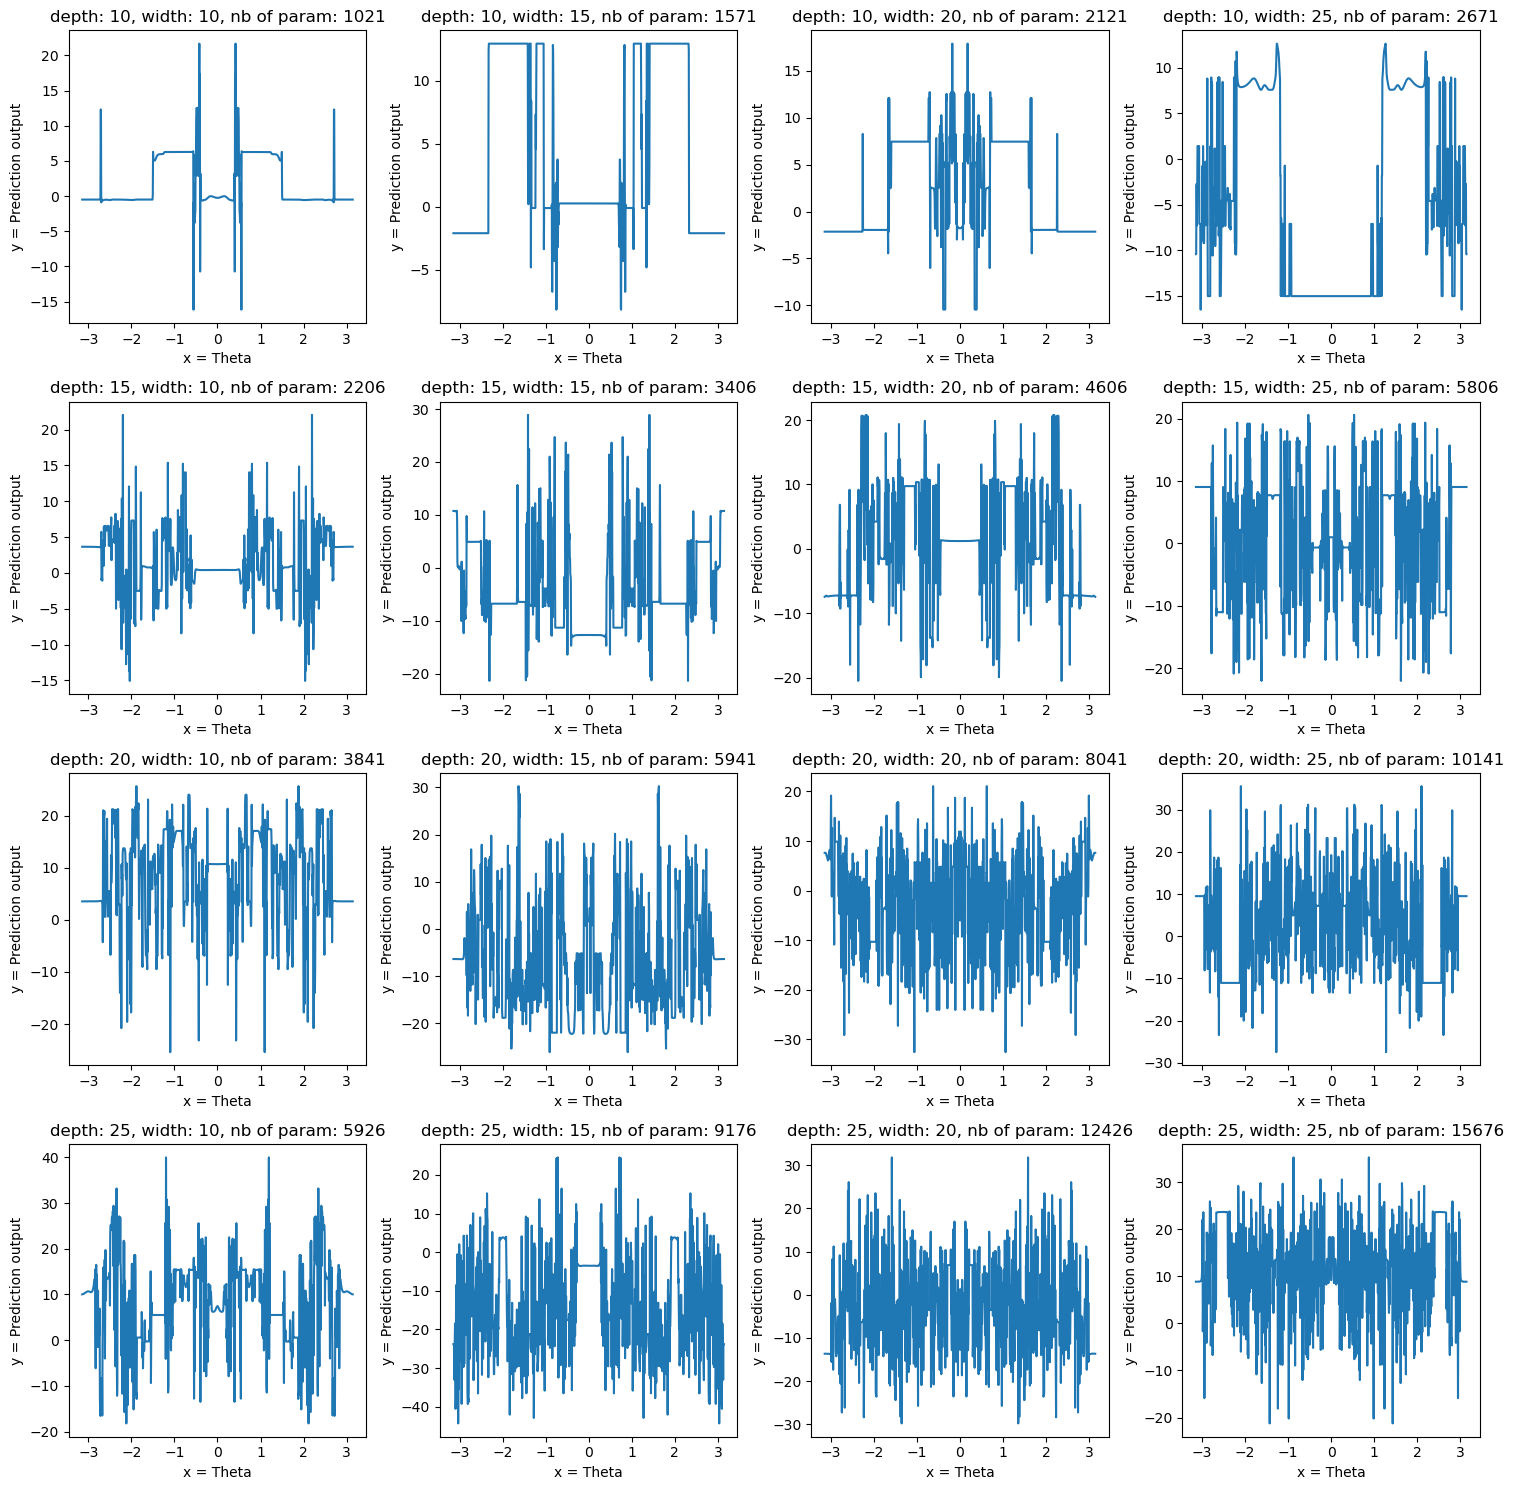

In [141]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.Tanh())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
        axs[i, j].plot(theta, y_pred)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("x = Theta")
        axs[i, j].set_ylabel("y = Prediction output")

fig.tight_layout()
plt.show()

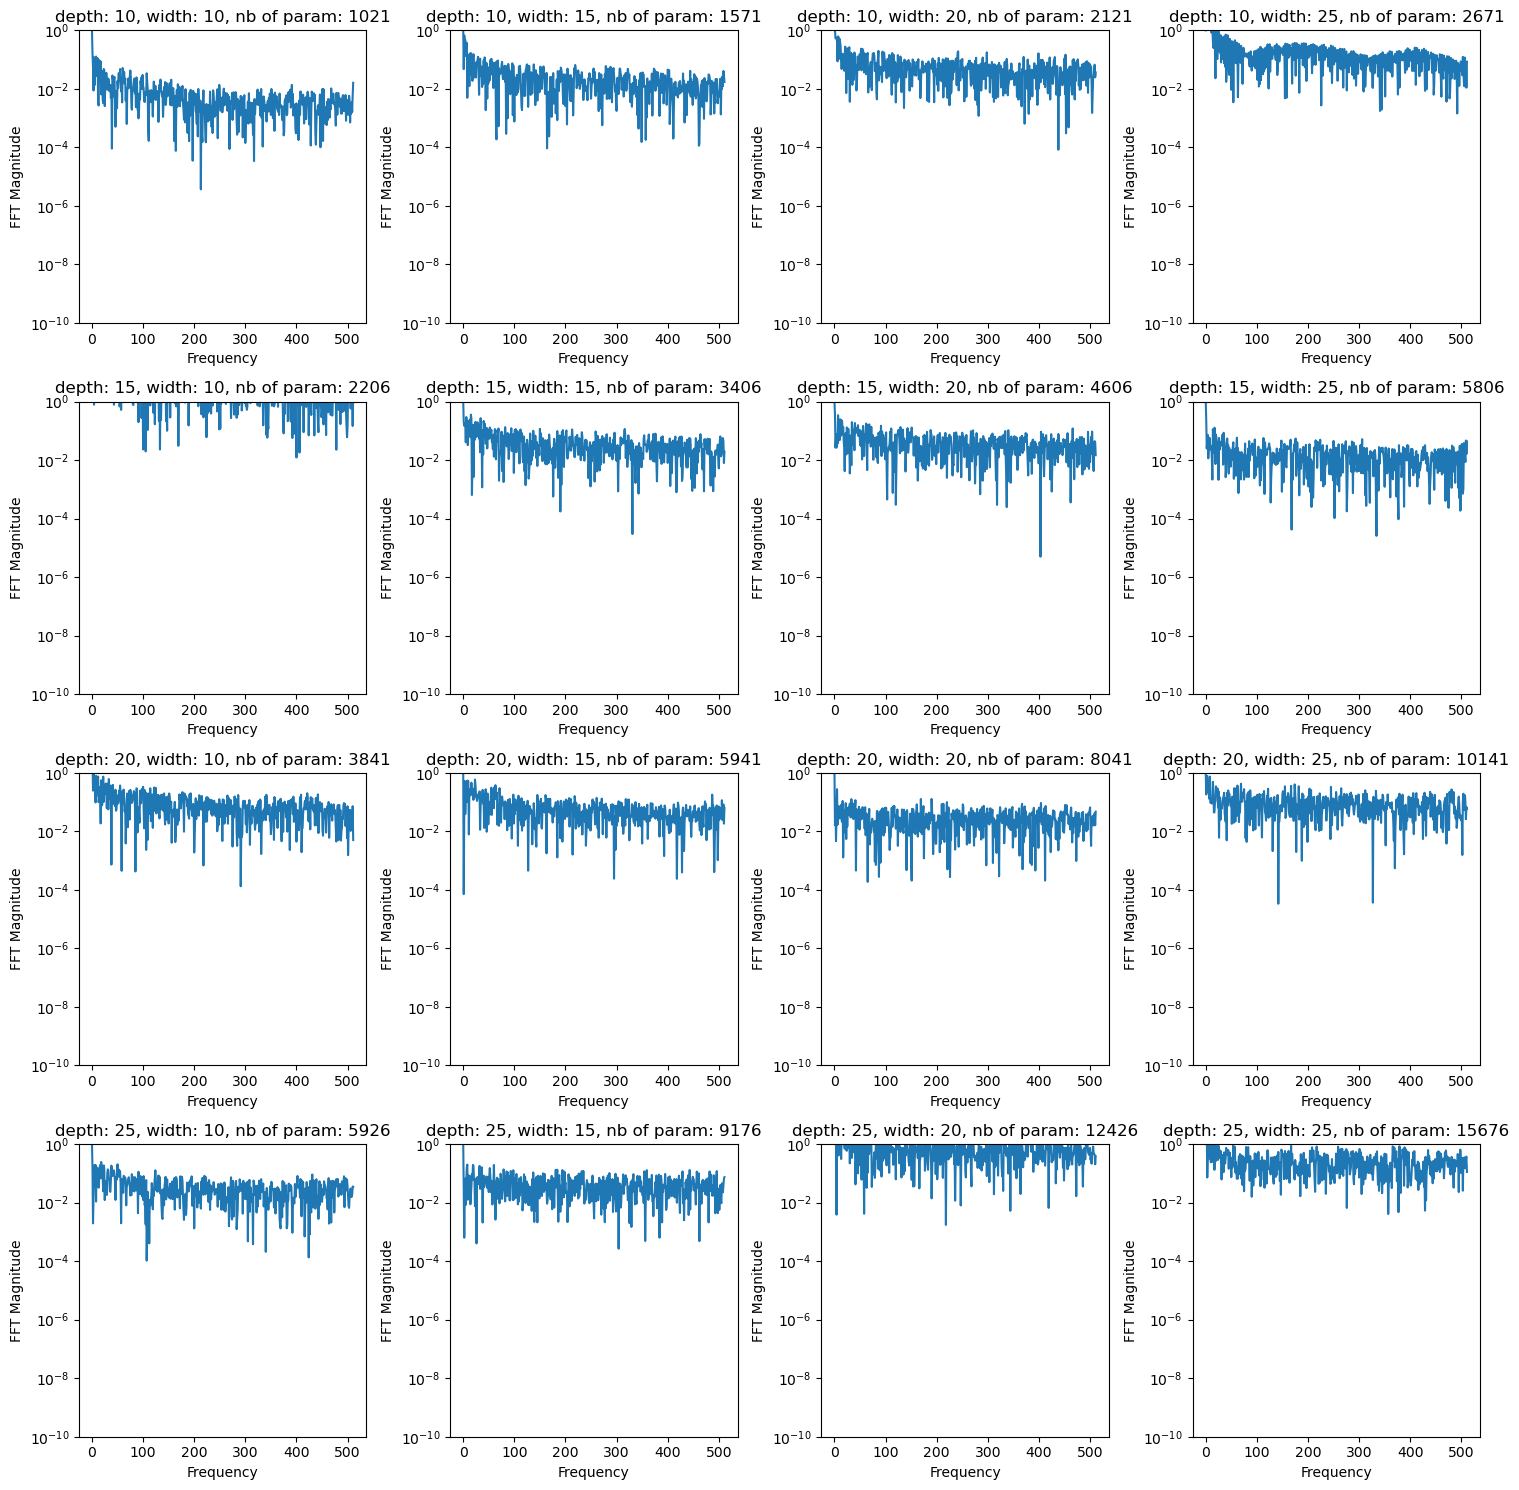

In [142]:
input_dim  = 1
output_dim = 1
width_ls   = [10, 15, 20, 25]
depth_ls   = [10, 15, 20, 25]

theta = np.linspace(- np.pi, np.pi, 1024)
y     = np.cos(theta)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, width in enumerate(width_ls):
    for j, depth in enumerate(depth_ls):
        model = DNN(input_dim, output_dim, width, depth, nn.Tanh())
        with torch.no_grad():
            y_pred = model(torch.Tensor(y).view(-1, input_dim)).detach().numpy().flatten()
            y_pred_fft = np.abs(np.fft.fft(y_pred))[:len(y_pred)//2]
            y_pred_fft /= y_pred_fft[0]
        axs[i, j].semilogy(y_pred_fft)
        axs[i, j].set_title("depth: {}, width: {}, nb of param: {}"\
                            .format(width, depth, sum(p.numel() for p in model.parameters())))
        axs[i, j].set_xlabel("Frequency")
        axs[i, j].set_ylabel("FFT Magnitude")
        axs[i, j].set_ylim([1e-10, 1])

fig.tight_layout()
plt.show()

Modifying a leads to different behaviours, since this can affect the convergence behaviour of our neural network. Moreover, a different initialization can lead to different local minima and different optimization paths. 
By incrementally increasing the values of a, we can see that with higher values of a (here a = 5) our network presents more oscillations, especially with tanh which can no longer be considered viable. This is due to the fact that tanh has a smaller activation range than relu.